## Importing the relevant packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [16]:
import yfinance as yf

df_comp = yf.download("BTC-USD", period="5Y", interval="1D")


[*********************100%***********************]  1 of 1 completed


In [17]:
df_comp['market_value']=df_comp.Open

In [18]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [19]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [20]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [21]:
df['returns'] = df.market_value.pct_change(1)*100

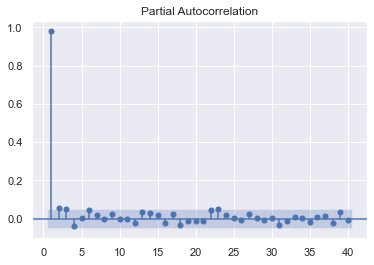

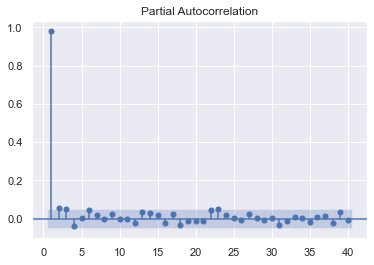

In [33]:
sgt.plot_pacf(df.market_value, zero=False, lags=40)

## ARMA(1,1)

In [22]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 1460
Model:                     ARMA(1, 1)   Log Likelihood               -4154.442
Method:                       css-mle   S.D. of innovations              4.164
Date:                Sat, 08 Jan 2022   AIC                           8316.884
Time:                        15:25:31   BIC                           8338.029
Sample:                    01-09-2017   HQIC                          8324.772
                         - 01-07-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3415      0.108      3.166      0.002       0.130       0.553
ar.L1.returns    -0.8867      0.103     -8.629      0.000      -1.088      -0.685
ma.L1.returns     0.8678      0.110      7.885      0.000       0.652       1.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1278           +0.0000j            1.1278            0.5000
MA.1           -1.1523           +0.0000j            1.1523            0.5000
-----------------------------------------------------------------------------
"""

## Higher-Lag ARMA Models

In [23]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [24]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 1460
Model:                     ARMA(3, 3)   Log Likelihood               -4147.118
Method:                       css-mle   S.D. of innovations              4.138
Date:                Sat, 08 Jan 2022   AIC                           8310.235
Time:                        15:26:26   BIC                           8352.525
Sample:                    01-09-2017   HQIC                          8326.011
                         - 01-07-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3607      0.167      2.159      0.031       0.033       0.688
ar.L1.returns    -0.6410      0.027    -23.454      0.000      -0.695      -0.587
ar.L2.returns     0.5969      0.044     13.498      0.000       0.510       0.684
ar.L3.returns     0.9806      0.027     36.011      0.000       0.927       1.034
ma.L1.returns     0.6481      0.033     19.347      0.000       0.582       0.714
ma.L2.returns    -0.5779      0.054    -10.680      0.000      -0.684      -0.472
ma.L3.returns    -0.9727      0.033    -29.053      0.000      -1.038      -0.907
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0179           -0.0000j            1.0179           -0.0000
AR.2           -0.8133           -0.5835j            1.0010           -0.4010
AR.3           -0.8133           +0.5835j            1.0010            0.4010
MA.1            1.0277           -0.0000j            1.0277           -0.0000
MA.2           -0.8109           -0.5855j            1.0002           -0.4005
MA.3           -0.8109           +0.5855j            1.0002            0.4005
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

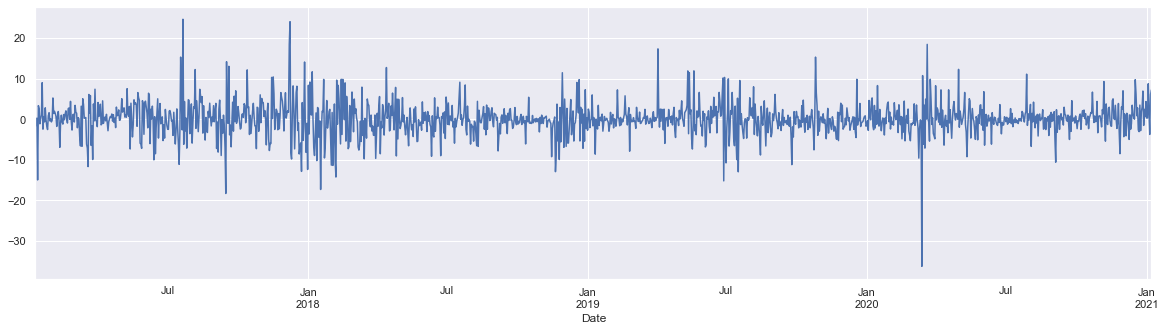

In [27]:
results_ret_ar_3_ma_3.resid.plot(figsize=(20,5))

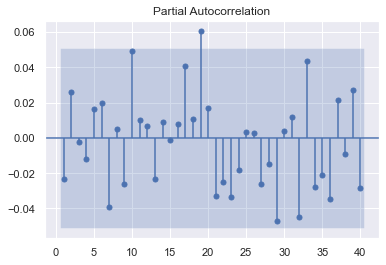

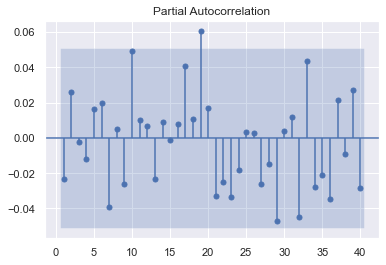

In [30]:
sgt.plot_pacf(results_ret_ar_3_ma_3.resid, zero=False, lags=40)